# Means (Supermarket Customer Problem)

Thisproblem has an objective to group the supermarket customer into coherent clusters based on three customer information - age, annual income and spending score. 

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

from sklearn.cluster import KMeans

# Plotting library
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# library written for this exam
import utilsKMeans as utils

%load_ext autoreload
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### We start this exam problem by first loading the dataset. 

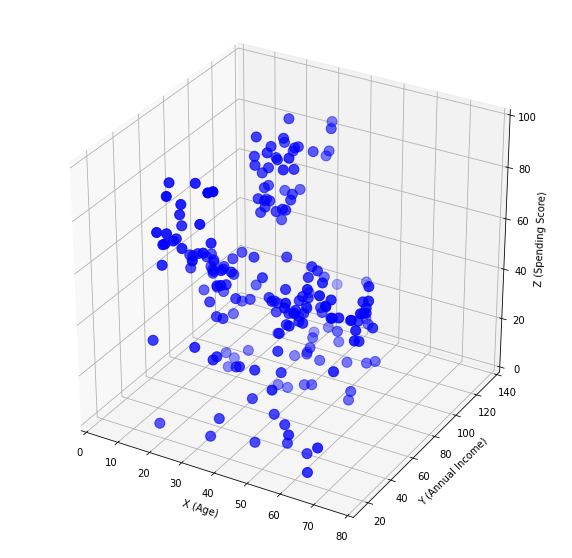

In [3]:
# Load the dataset into the variable X 
data = np.loadtxt(os.path.join('Data', 'KMeansSupermarketData.txt'))
X = data

m = X.shape[0] # number of training examples

fig = pyplot.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
xdata = data[:,0]
ydata = data[:,1]
zdata = data[:,2]
ax.set_xlim(0, 80); ax.set_ylim(10, 140); ax.set_zlim(0, 100);
ax.set_xlabel('X (Age)')
ax.set_ylabel('Y (Annual Income)')
ax.set_zlabel('Z (Spending Score)')
ax.scatter3D(xdata, ydata, zdata, s=100, c='b', marker='o')

### Set initial centroids

In [12]:
def findClosestCentroids(X, centroids):

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================
    for i in np.arange(idx.size):
            J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
            
            idx[i] = np.argmin(J)
            # np.argmin() returns the index of the minimum value
    
    # =============================================================
    return idx

In [10]:
initial_centroids = np.array([[21., 15., 81.], [38., 78., 76.], [29., 40., 42.], [24., 60., 52.]])
K=4

idx, J = findClosestCentroids(X, initial_centroids)

print('Centroids computed after initial finding of closest centroids:')
print(initial_centroids)
print("first ")
print(X[:1])
print(" ")
print(idx[:1])
print("last ")
print(X[199:])
print(" ")
print(idx[199:])


Centroids computed after initial finding of closest centroids:
[[21. 15. 81.]
 [38. 78. 76.]
 [29. 40. 42.]
 [24. 60. 52.]]
first 
[[19. 15. 39.]]
 
[2]
last 
[[ 30. 137.  83.]]
 
[1]


In [7]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================
    #sum axis = 0 mean sum in column, sum axis = 1 mean sum in row
    for i in np.arange(K):
    #for i in range(K):
            #print(X[idx == i ])
            #np.mean(X[idx == i], axis = 0)
            centroids[i] = np.mean(X[idx == i], axis = 0)
        
    # =============================================================
    return centroids

In [10]:
centroids = computeCentroids(X, idx, K)

[0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[21. 15. 81.]
 [38. 78. 76.]
 [29. 40. 42.]
 [24. 60. 52.]]


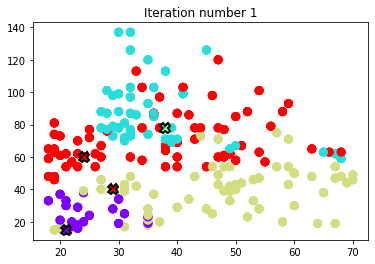

In [18]:
K=4
max_iters = 20
initial_centroids = np.array([[21., 15., 81.], [38., 78., 76.], [29., 40., 42.], [24., 60., 52.]])
centroids, idx, anim = utils.runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters, True)
print(idx)
print(initial_centroids)